<a href="https://colab.research.google.com/github/seanita/deep_learning_with_python/blob/master/reuters_reviews_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load reuters dataset

In [14]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print(len(train_data))
print(len(test_data))
# print(train_data)
# print(train_labels[0])

8982
2246


In [15]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ''.join([reverse_word_index.get(i - 20, '?') for i in train_data[0]])

print(decoded_newswire)
print(train_labels[9])

????cts?loans?saidcountriesdeficit?tighteningmarch?35worldnewwhich?9??been??if?newwhichshareoffarmand?with?2?stabilityfromwestall?12?trade??ofrose???with?437offersdeclined?statement?prior??ofoverby????avgcyclopsnewwhichbillion3westfordlrswe?after???
16


Vectorize train and test data

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
  
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

Apply one-hot encoding to label data. Each label is an all-zero vector with a 1 in place of the label index.

In [0]:
from keras.utils.np_utils import to_categorical
'''
# Here's another way to do this without using Keras built-in function.
def to one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)
'''

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

Building the network. Three layers - 1 input, 1 hidden and 1 output. Final layer needs to output all 46 classes, so the iniital input and hidden layers have slightly larger nodes, 64 each.

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Setting add 1000 samples from train data as validation set

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

Training the model. 20 epochs.

In [0]:
history = model.fit(partial_x_train, 
                    partial_y_train, 
                    epochs=20, 
                    batch_size=512,
                    validation_data = (x_val, y_val))

Plot training and accuracy data

<function matplotlib.pyplot.show>

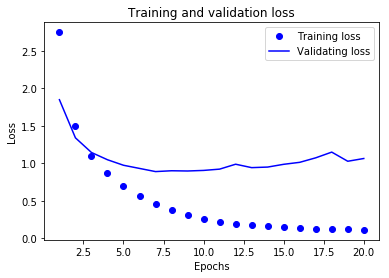

In [24]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validating loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show



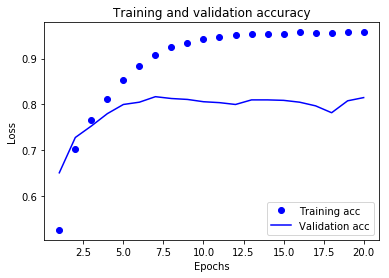

In [25]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [31]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, 
                    partial_y_train, 
                    epochs=9, 
                    batch_size=512,
                    validation_data = (x_val, y_val))


results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 169us/step - loss: 2.7669 - acc: 0.5317 - val_loss: 1.8415 - val_acc: 0.6310
Epoch 2/9
7982/7982 [==============================] - 1s 131us/step - loss: 1.4892 - acc: 0.7035 - val_loss: 1.3310 - val_acc: 0.7030
Epoch 3/9
7982/7982 [==============================] - 1s 131us/step - loss: 1.0865 - acc: 0.7784 - val_loss: 1.1501 - val_acc: 0.7480
Epoch 4/9
7982/7982 [==============================] - 1s 132us/step - loss: 0.8598 - acc: 0.8240 - val_loss: 1.0363 - val_acc: 0.7840
Epoch 5/9
7982/7982 [==============================] - 1s 141us/step - loss: 0.6833 - acc: 0.8607 - val_loss: 1.0201 - val_acc: 0.7740
Epoch 6/9
7982/7982 [==============================] - 1s 139us/step - loss: 0.5466 - acc: 0.8877 - val_loss: 0.9173 - val_acc: 0.8170
Epoch 7/9
7982/7982 [==============================] - 1s 134us/step - loss: 0.4413 - acc: 0.9077 - val_loss: 0.9205 - val_acc: 0.8100
Epoch 8